# Split the prepped, released data for the model

In [1]:
# Import packages we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,shutil

In [2]:
#load the release data
release_data = pd.read_csv('../data/tables/labelerdata/ReleaseData08222021.csv')

In [3]:
priority = release_data

In [4]:
list(priority.columns)

['Unnamed: 0',
 'userId',
 'archive',
 'image',
 'allWater',
 'devType',
 'washoverType',
 'dmgType',
 'impactType',
 'terrianType',
 'total',
 'NOAA_flight']

In [5]:
washData = priority[['image', 'userId', 'washoverType']]
priority = priority.replace({np.NaN: 'noWashover'})
washData.head()

,image,userId,washoverType
0,P26058806.jpg,1,noWashover
1,P26057665.jpg,1,noWashover
2,P26059250.jpg,1,washover
3,P26060067.jpg,1,noWashover
4,P26057539.jpg,1,washover


In [6]:
# pivot the wash data
washDataPivot = washData.pivot(index= 'image', columns='userId')
washDataPivot.head()

washoverType                                               ...  \
userId                  1    2    3    4    5    6    7    8    9    10  ...   
image                                                                    ...   
C19748971.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
C19851841.jpg   noWashover  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
C19852082.jpg   noWashover  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
C19852202.jpg   noWashover  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
C19853533.jpg   noWashover  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                                                                 
userId          14   15   16   17   18   19   20   21   22   23  
image                                                            
C19748971.jpg  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
C19851841.jpg  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
C19852082.jpg  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
C19852202.jpg  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
C19853533.jpg  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 23 columns]

In [7]:
#save it to a file
washDataPivot.to_csv('../data/tables/labelerdata/Pivoted_Wash.csv')

### Now investigate the data

In [8]:
wash = pd.read_csv('../data/tables/labelerdata/Pivoted_Wash.csv', skiprows = 2)
#del wash ['Unnamed: 2']

#wash.head()

In [9]:
wash = wash.replace('noWashover', 0)
wash = wash.replace('washover', 1)
wash.head()

,image,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,C19748971.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C19851841.jpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C19852082.jpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C19852202.jpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C19853533.jpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#add a summary column to count washover votes
col_list= list(wash)
col_list.remove('image')
wash['wash_votes'] = wash[col_list].sum(axis=1)
wash["wash_votes"] = pd.to_numeric(wash["wash_votes"], errors='coerce')
wash.head()

#save to file
#wash.to_csv('../data/tables/washtally.csv')

,image,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,wash_votes
0,C19748971.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,C19851841.jpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,C19852082.jpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,C19852202.jpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,C19853533.jpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
#extract just the vote data
washScores = wash[['image','wash_votes']]
washScores

,image,wash_votes
0,C19748971.jpg,1.0
1,C19851841.jpg,0.0
2,C19852082.jpg,0.0
3,C19852202.jpg,0.0
4,C19853533.jpg,0.0
...,...,...
2495,S30375085.jpg,2.0
2496,S30472423.jpg,0.0
2497,S30472426.jpg,0.0
2498,S30472453.jpg,0.0


In [12]:
#join hashes and washScores
df = pd.read_csv('../data/tables/MasterDF.csv')

# selecting rows based on bbeing labeled
L_df = df[df['labeled'].notnull()]

#Any Duplicates?, should be false via: https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column
print(L_df['image'].duplicated().any())
print(L_df.shape)
L_df.to_csv('../data/TestS.csv')

False
(2882, 19)


In [13]:
### Subset just the filename and the image
L_df = L_df[['Filename','image']]

#merge to WASH dataframe
joinedWash = pd.merge(washScores, L_df, on="image", how = "left")

#joinedWash= joinedWash.drop_duplicates()
joinedWash.to_csv('../data/Test.csv')
joinedWash

,image,wash_votes,Filename
0,C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg
1,C19851841.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19851841.jpg
2,C19852082.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19852082.jpg
3,C19852202.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19852202.jpg
4,C19853533.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19853533.jpg
...,...,...,...
2495,S30375085.jpg,2.0,Zeta/20201029c_jpgs/jpgs/S30375085.jpg
2496,S30472423.jpg,0.0,Zeta/20201030a_jpgs/jpgs/S30472423.jpg
2497,S30472426.jpg,0.0,Zeta/20201030a_jpgs/jpgs/S30472426.jpg
2498,S30472453.jpg,0.0,Zeta/20201030a_jpgs/jpgs/S30472453.jpg


Text(0, 0.5, 'number of images')

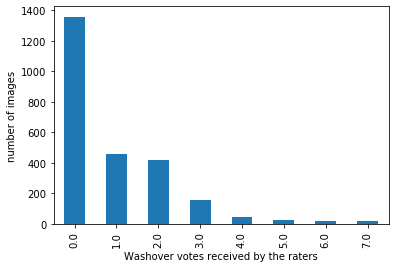

In [14]:
#plot it up
ax = joinedWash['wash_votes'].value_counts().sort_index().plot.bar()
ax.set_xlabel("Washover votes received by the raters")
ax.set_ylabel("number of images")

## Now we can go back to splitting the washover data based on votes:

In [15]:
washTally = joinedWash
washTally.head()

,image,wash_votes,Filename
0,C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg
1,C19851841.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19851841.jpg
2,C19852082.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19852082.jpg
3,C19852202.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19852202.jpg
4,C19853533.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19853533.jpg


In [16]:
#add the path
washTally['Image_Path'] = '/data/NOAA_ERI/' + washTally['Filename']
washTally.head()

,image,wash_votes,Filename,Image_Path
0,C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/C1974...
1,C19851841.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19851841.jpg,/data/NOAA_ERI/Barry/20190717a_jpgs/jpgs/C1985...
2,C19852082.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19852082.jpg,/data/NOAA_ERI/Barry/20190717a_jpgs/jpgs/C1985...
3,C19852202.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19852202.jpg,/data/NOAA_ERI/Barry/20190717a_jpgs/jpgs/C1985...
4,C19853533.jpg,0.0,Barry/20190717a_jpgs/jpgs/C19853533.jpg,/data/NOAA_ERI/Barry/20190717a_jpgs/jpgs/C1985...


In [17]:
#if image has 1 or more vote for washover, it is a washover

MaxVote = int(washTally['wash_votes'].max() +1)

for i in range(0,MaxVote):
    #pull out the list from the df
    Tally = washTally[washTally['wash_votes'] == i]
    TallyList = Tally['Image_Path'].tolist()
    if i == 0:
        TallyFolder = '../data/pics/labelertoModel/AllRoundsFive/nowash'
    else:
        TallyFolder = '../data/pics/labelertoModel/AllRoundsFive/wash'
    print(TallyFolder)
    #move those on the list
    for f in TallyList:
        shutil.copy(f, TallyFolder)

../data/pics/labelertoModel/AllRoundsFive/nowash
../data/pics/labelertoModel/AllRoundsFive/wash
../data/pics/labelertoModel/AllRoundsFive/wash
../data/pics/labelertoModel/AllRoundsFive/wash
../data/pics/labelertoModel/AllRoundsFive/wash
../data/pics/labelertoModel/AllRoundsFive/wash
../data/pics/labelertoModel/AllRoundsFive/wash
../data/pics/labelertoModel/AllRoundsFive/wash
